## Computer Vision!

In this course, you'll:

- Use modern deep-learning networks to build an image classifier with Keras
- Design your own custom convnet with reusable blocks
- Learn the fundamental ideas behind visual feature extraction
- Master the art of transfer learning to boost your models
- Utilize data augmentation to extend your dataset
- If you've taken the Introduction to Deep Learning course, you'll know everything you need to be successful.

## Introduction

This course will introduce you to the fundamental ideas of computer vision. Our goal is to learn how a neural network can "understand" a natural image well-enough to solve the same kinds of problems the human visual system can solve.

The neural networks that are best at this task are called convolutional neural networks (Sometimes we say convnet or CNN instead.) Convolution is the mathematical operation that gives the layers of a convnet their unique structure. In future lessons, you'll learn why this structure is so effective at solving computer vision problems.

We will apply these ideas to the problem of image classification: given a picture, can we train a computer to tell us what it's a picture of? You may have seen apps that can identify a species of plant from a photograph. That's an image classifier! In this course, you'll learn how to build image classifiers just as powerful as those used in professional applications.

While our focus will be on image classification, what you'll learn in this course is relevant to every kind of computer vision problem. At the end, you'll be ready to move on to more advanced applications like generative adversarial networks and image segmentation.

## The Convolutional Classifier

A convnet used for image classification consists of two parts: a convolutional base and a dense head.

<img src="https://i.imgur.com/U0n5xjU.png"/>

The **base** is used to **extract the features from an image**. **It is formed primarily of layers performing the convolution operation**, but often includes other kinds of layers as well. (You'll learn about these in the next lesson.)

The **head** is used to **determine the class of the image**. It is formed primarily of **dense layers, but might include other layers like dropout**.

What do we mean by visual feature? A feature could be a line, a color, a texture, a shape, a pattern -- or some complicated combination.

The whole process goes something like this:

<img src="https://i.imgur.com/UUAafkn.png" width=50%/>

The features actually extracted look a bit different, but it gives the idea.

## Training the Classifier

The goal of the network during training is to learn two things:

1. which features to extract from an image (base),
2. which class goes with what features (head).

These days, convnets are rarely trained from scratch. More often, we **reuse the base of a pretrained model**. To the pretrained base we then **attach an untrained head**. In other words, we reuse the part of a network that has already learned to do 1. Extract features, and attach to it some fresh layers to learn 2. Classify.

<img src="https://imgur.com/E49fsmV.png" width=50%/>

Because the head usually consists of only a few dense layers, very accurate classifiers can be created from relatively little data.

Reusing a **pretrained model** is a technique known as transfer learning. It is so effective, that almost every image classifier these days will make use of it.

## Example - Train a Convnet Classifier

Throughout this course, we're going to be creating classifiers that attempt to solve the following problem: is this a picture of a Car or of a Truck? Our dataset is about 10,000 pictures of various automobiles, around half cars and half trucks.

## Step 1 - Load Data

This next hidden cell will import some libraries and set up our data pipeline. We have a training split called ds_train and a validation split called ds_valid

If your directory structure is:

    main_directory/
    ...class_a/
    ......a_image_1.jpg
    ......a_image_2.jpg
    ...class_b/
    ......b_image_1.jpg
    ......b_image_2.jpg

Then calling **image_dataset_from_directory**(main_directory, labels='inferred') will return a tf.data.Dataset that yields batches of images from the subdirectories class_a and class_b, together with labels 0 and 1 (0 corresponding to class_a and 1 corresponding to class_b).

**Supported image formats: jpeg, png, bmp, gif. Animated gifs are truncated to the first frame.

In [1]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec # A grid layout to place subplots within a figure

import numpy as np
import tensorflow as tf

# Generates a tf.data.Dataset from image files in a directory.

from tensorflow.keras.preprocessing import image_dataset_from_directory

Neural network algorithms are stochastic.

This means they make use of randomness, such as initializing to random weights, and in turn the same network trained on the same data can produce different results.

This can be confusing to beginners as the algorithm appears unstable, and in fact they are by design. The random initialization allows the network to learn a good approximation for the function being learned.

Nevertheless, there are times when you need the exact same result every time the same network is trained on the same data

Link: https://machinelearningmastery.com/reproducible-results-neural-networks-keras/

When you are training or running a tensorflow model, you may find a confused phenomena: The model result may have a little difference during multiple executions, which means the tensorflow model result is not stable. You can not get repeated result.

Why tensorflow model result is not stable?

The main reason is the weight variables are initialized by some random initializers in tensorflow. These random initializers will generate different values for weight variables in tensorflow.

How to make tensorflow model result is stable?

We should make random initializers generate the same values during different executions. We can set a random seed.

Bellow, it was set a SEED for python, numpy and tensorflow random initializers.

In [2]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

In [3]:
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

interpolation: String, the interpolation method used when resizing images.
    Defaults to `bilinear`. Supports `bilinear`, `nearest`, `bicubic`,
    `area`, `lanczos3`, `lanczos5`, `gaussian`, `mitchellcubic`.

In [4]:
# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    'data/car-truck/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

Found 5117 files belonging to 2 classes.


In [5]:
ds_valid_ = image_dataset_from_directory(
    'data/car-truck/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 5051 files belonging to 2 classes.


In [6]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [8]:
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Let's take a look at a few examples from the training set.



In [9]:
import matplotlib.pyplot as plt

## Step 2 - Define Pretrained Base

The most commonly used dataset for pretraining is ImageNet, a large dataset of many kind of natural images. Keras includes a variety models pretrained on ImageNet in its applications module. The pretrained model we'll use is called VGG16.

In [10]:
pretrained_base = tf.keras.models.load_model(
    'data/cv-course-models/vgg16-pretrained-base',
)
pretrained_base.trainable = False

## Step 3 - Attach Head

Next, we attach the classifier head. For this example, we'll use a layer of hidden units (the first Dense layer) followed by a layer to transform the outputs to a probability score for class 1, Truck. The Flatten layer transforms the two dimensional outputs of the base into the one dimensional inputs needed by the head.

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

## Step 4 - Train

Finally, let's train the model. Since this is a two-class problem, we'll use the binary versions of crossentropy and accuracy. The adam optimizer generally performs well, so we'll choose it as well.

In [12]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [16]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=3,
    verbose=1,
)

Epoch 1/3
80/80 [==============================] - 1249s 16s/step - loss: 0.3650 - binary_accuracy: 0.8446 - val_loss: 0.3516 - val_binary_accuracy: 0.8545
Epoch 2/3
80/80 [==============================] - 1067s 13s/step - loss: 0.3170 - binary_accuracy: 0.8720 - val_loss: 0.3318 - val_binary_accuracy: 0.8604
Epoch 3/3
80/80 [==============================] - 1054s 13s/step - loss: 0.2823 - binary_accuracy: 0.8876 - val_loss: 0.3199 - val_binary_accuracy: 0.8650


When training a neural network, it's always a good idea to examine the loss and metric plots. The history object contains this information in a dictionary history.history. We can use Pandas to convert this dictionary to a dataframe and plot it with a built-in method.

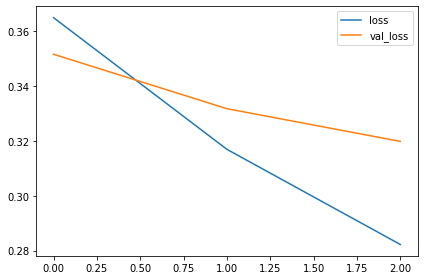

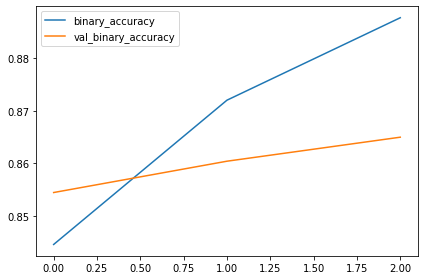

In [17]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

## Conclusion

In this lesson, we learned about the structure of a convnet classifier: a head to act as a classifier atop of a base which performs the feature extraction.

The head, essentially, is an ordinary classifier like you learned about in the introductory course. For features, it uses those features extracted by the base. This is the basic idea behind convolutional classifiers: that we can attach a unit that performs feature engineering to the classifier itself.

This is one of the big advantages deep neural networks have over traditional machine learning models: given the right network structure, the deep neural net can learn how to engineer the features it needs to solve its problem.

For the next few lessons, we'll take a look at how the convolutional base accomplishes the feature extraction. Then, you'll learn how to apply these ideas and design some classifiers of your own.

## Exercise